# Test data science

##Importation des librairies

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [41]:
df = pd.read_excel("C:/Users/KOUADIO Christiane/Documents/Traitement_données/donnees_sncf.xlsx")

In [42]:
# lire l'entête du data frame
df.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2019-01-14,800,854,82,BOIS-COLOMBES,72179.0,IMAGINE R,907
1,2019-01-14,800,854,82,BOIS-COLOMBES,72179.0,TST,233
2,2019-01-14,800,854,831,SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY,64382.0,AMETHYSTE,4
3,2019-01-14,800,854,831,SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY,64382.0,NAVIGO,536
4,2019-01-14,800,854,831,SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY,64382.0,TST,9


In [43]:
# faire le point sur les variables et les observations
df.shape

(940549, 8)

In [44]:
# Description des variables numériques
df.describe()

,CODE_STIF_TRNS,ID_REFA_LDA,NB_VALD
count,940549.000000,928344.000000,940549.000000
mean,487.402443,71760.276284,1042.398621
std,349.303902,29543.625366,4039.458158
min,100.000000,59403.000000,4.000000
25%,100.000000,66659.000000,12.000000
50%,800.000000,71144.000000,109.000000
75%,800.000000,71756.000000,529.000000
max,810.000000,415852.000000,130809.000000


In [45]:
# Les 20 premières stations en terme de validations sont : pour répondre à cette question, nous allons classer par 
#ordre décroissante le df sur la serie "NB_VALD"
#df1=df.sort_values(by = 'NB_VALD', ascending = False)

In [46]:
#Supprimer certaines variables de notre data frame
df1=df.drop(columns=['JOUR','ID_REFA_LDA','CODE_STIF_TRNS','CODE_STIF_RES','CODE_STIF_ARRET','CATEGORIE_TITRE'])

In [47]:
df1.head

<bound method NDFrame.head of                                LIBELLE_ARRET  NB_VALD
0                              BOIS-COLOMBES      907
1                              BOIS-COLOMBES      233
2       SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY        4
3       SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY      536
4       SAINT-NOM-LA-BRETECHE-FORET-DE-MARLY        9
...                                      ...      ...
940544                      LA TOUR MAUBOURG       16
940545                      LA TOUR MAUBOURG      999
940546                              LAUMIERE       75
940547                              LAUMIERE        4
940548                              LAUMIERE      632

[940549 rows x 2 columns]>

In [48]:
# regrouper la somme du nombre de validation par arrêt
dq=df1.groupby(['LIBELLE_ARRET']).sum()

In [49]:
dq.head

<bound method NDFrame.head of                               NB_VALD
LIBELLE_ARRET                        
ABBESSES                       606945
ABLON                          232862
ACHERES-GRAND-CORMIER           11999
ACHERES-VILLE                  775714
AEROPORT CHARLES DE GAULLE 1  1140786
...                               ...
VOLTAIRE (LEON BLUM)          2163772
VOSVES                           2929
VULAINES-SUR-SEINE-SAMOREAU      6155
WAGRAM                        1017720
YERRES                         759518

[732 rows x 1 columns]>

In [50]:
#Ranger par ordre décroissant le nombre de valisation par arrêt
dqq=dq.sort_values(by = 'NB_VALD', ascending = False)[0:20]

In [51]:
#Q1) les 20 premiers arrêt en terme de validation
print(dqq)

                                   NB_VALD
LIBELLE_ARRET                             
LA DEFENSE-GRANDE ARCHE           31142290
GARE DU NORD                      28680379
GARE DE LYON                      27034653
CHATELET-LES HALLES               22227016
SAINT-LAZARE                      17780830
MONTPARNASSE                      15635869
NATION                            13806030
GARE DE L'EST                     13518664
CHARLES DE GAULLE ETOILE          10730798
AUBER                             10419879
BIBLIOTHEQUE FRANCOIS MITTERRAND  10199704
DENFERT-ROCHEREAU                  8476819
HAUSSMANN-SAINT-LAZARE             7442626
REPUBLIQUE                         7147580
LES HALLES                         6897957
LA CHAPELLE                        6459788
AUSTERLITZ                         6256202
SAINT-DENIS                        5173856
BASTILLE                           5003608
SAINT-MICHEL NOTRE DAME            4904789


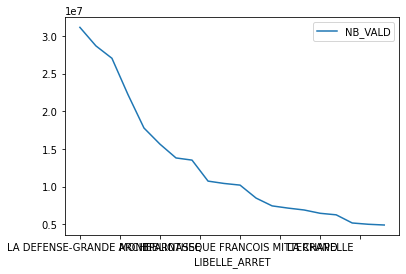

In [52]:
#Q2) Illustraton graphique de ce classement
dqq.plot()

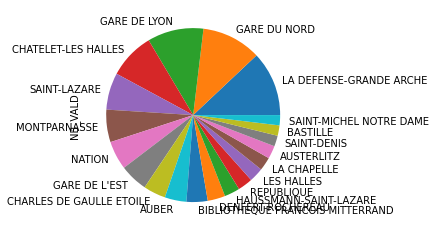

In [53]:
dqq['NB_VALD'].plot(kind='pie')